In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load final merged dataset
df = pd.read_csv("final_mergeddataset.csv")

# Basic overview
print(df.shape)
df.head()

(25623, 14)


,Customer_ID,Transaction_Date,Transaction_Amount,Transaction_Type,Transaction_Amount_Was_Missing,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend,Is_Weekend,Transaction_Amount_Log,Total_Transactions,Avg_Transaction_Amount,Avg_Satisfaction_Score,Recommend_Ratio
0,393,2023-01-01 00:00:00,3472.000000,Purchase,0,1.0,Excellent,3,True,8.152774,7,3195.000000,1.000000,0.3
1,826,2023-01-01 01:00:00,3094.726465,Bill Payment,0,6.0,Needs improvement,3,True,8.037778,18,2513.575488,6.166667,0.3
2,826,2023-01-01 01:00:00,3094.726465,Bill Payment,0,10.0,Good service,5,True,8.037778,18,2513.575488,6.166667,0.5
3,826,2023-01-01 01:00:00,3094.726465,Bill Payment,0,6.0,Unsatisfactory,8,True,8.037778,18,2513.575488,6.166667,0.8
4,826,2023-01-01 01:00:00,3094.726465,Bill Payment,0,3.0,Unsatisfactory,4,True,8.037778,18,2513.575488,6.166667,0.4


In [15]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25623 entries, 0 to 25622
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_ID                     25623 non-null  int64  
 1   Transaction_Date                25623 non-null  object 
 2   Transaction_Amount              25623 non-null  float64
 3   Transaction_Type                25623 non-null  object 
 4   Transaction_Amount_Was_Missing  25623 non-null  int64  
 5   Satisfaction_Score              25623 non-null  float64
 6   Feedback_Comments               25623 non-null  object 
 7   Likelihood_to_Recommend         25623 non-null  int64  
 8   Is_Weekend                      25623 non-null  bool   
 9   Transaction_Amount_Log          25623 non-null  float64
 10  Total_Transactions              25623 non-null  int64  
 11  Avg_Transaction_Amount          25623 non-null  float64
 12  Avg_Satisfaction_Score          

,Customer_ID,Transaction_Amount,Transaction_Amount_Was_Missing,Satisfaction_Score,Likelihood_to_Recommend,Transaction_Amount_Log,Total_Transactions,Avg_Transaction_Amount,Avg_Satisfaction_Score,Recommend_Ratio
count,25623.000000,25623.000000,25623.0,25623.000000,25623.000000,25623.000000,25623.000000,25623.000000,25623.000000,25623.000000
mean,506.270772,3087.654096,0.0,5.688444,5.527339,7.538939,36.579440,3087.654096,5.688444,0.552734
std,291.475358,14547.384481,0.0,3.551949,2.876037,0.968450,21.369595,6181.630418,1.617690,0.287604
min,1.000000,10.000000,0.0,1.000000,1.000000,2.397895,1.000000,286.000000,1.000000,0.100000
25%,254.000000,1247.000000,0.0,3.000000,3.000000,7.129298,21.000000,2051.500000,4.750000,0.300000
50%,509.000000,2512.000000,0.0,6.000000,6.000000,7.829233,32.000000,2478.666667,5.600000,0.600000
75%,763.000000,3660.000000,0.0,8.000000,8.000000,8.205492,48.000000,2896.800000,6.500000,0.800000
max,1000.000000,480300.000000,0.0,60.000000,10.000000,13.082168,132.000000,144144.000000,29.500000,1.000000


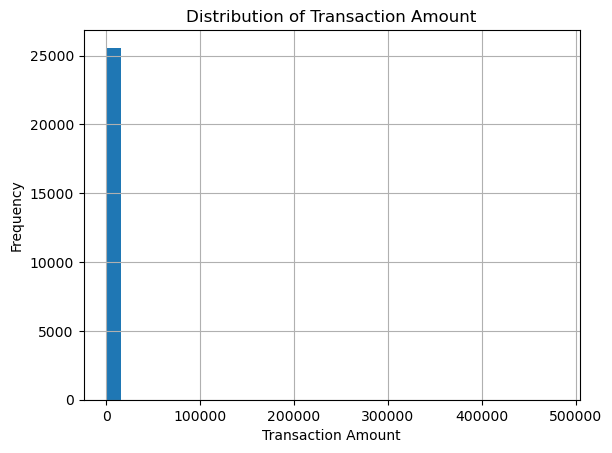

In [16]:
#Distribution of Transaction Amount
plt.figure()
df["Transaction_Amount"].hist(bins=30)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

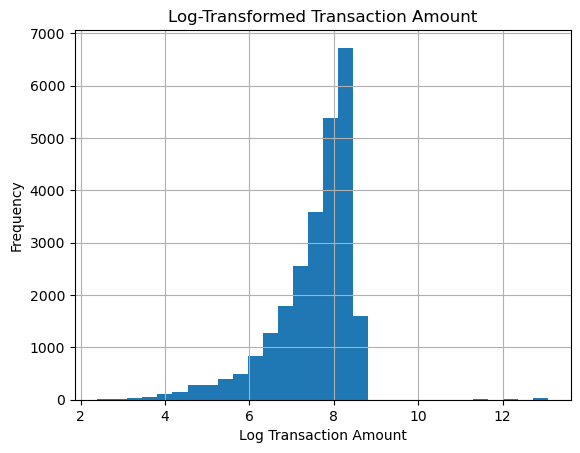

In [17]:
#This is Log Transformed Amount
plt.figure()
df["Transaction_Amount_Log"].hist(bins=30)
plt.title("Log-Transformed Transaction Amount")
plt.xlabel("Log Transaction Amount")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Recreate Income Level Group using quartiles

q1 = df['Transaction_Amount'].quantile(0.33)
q2 = df['Transaction_Amount'].quantile(0.66)

def income_group(amount):

    if amount <= q1:
        return "Low Income"

    elif amount <= q2:
        return "Middle Income"

    else:
        return "High Income"

df["Derived_Income_Level"] = df["Transaction_Amount"].apply(income_group)

# Verify column exists
print(df["Derived_Income_Level"].value_counts())

Derived_Income_Level
High Income      8712
Low Income       8459
Middle Income    8452
Name: count, dtype: int64


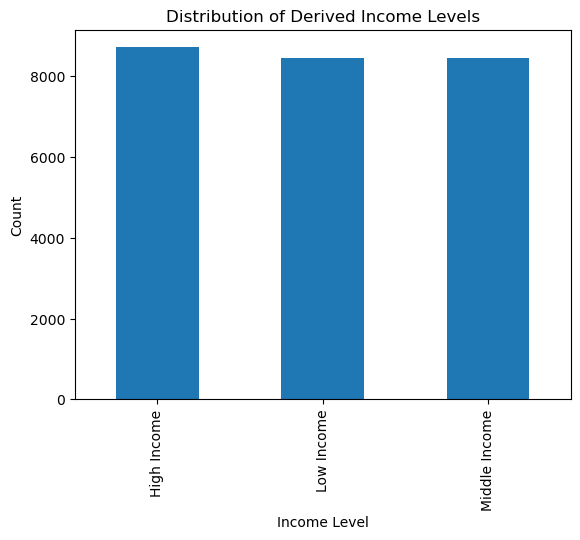

In [19]:
#Income Group Distribution
plt.figure()
df["Derived_Income_Level"].value_counts().plot(kind="bar")
plt.title("Distribution of Derived Income Levels")
plt.xlabel("Income Level")
plt.ylabel("Count")
plt.show()

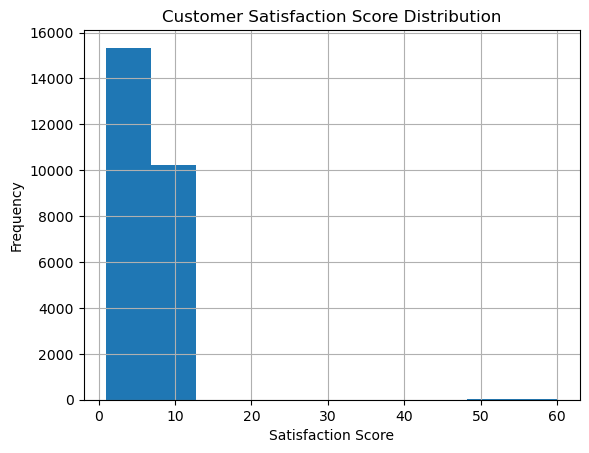

In [20]:
# Satisfaction Score Distribution
plt.figure()
df["Satisfaction_Score"].hist(bins=10)
plt.title("Customer Satisfaction Score Distribution")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.show()

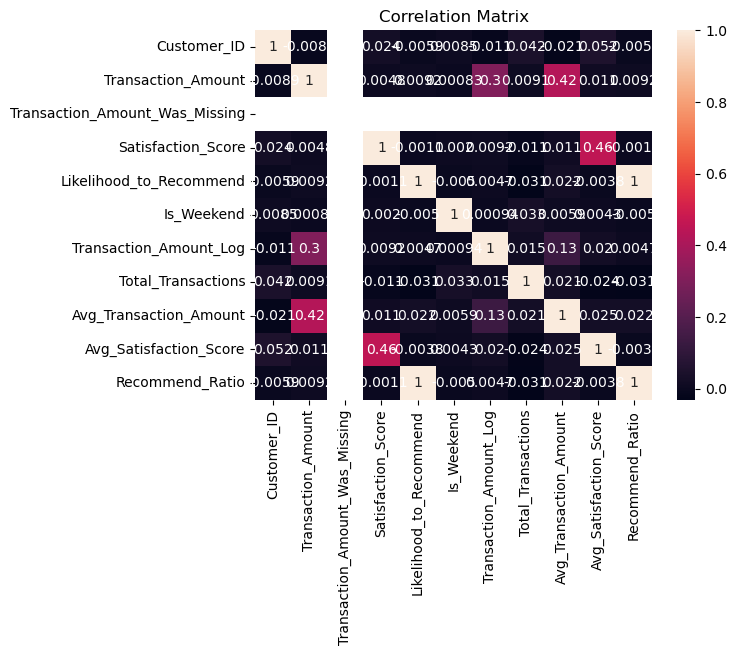

In [21]:
#Correlation Matrix
plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()

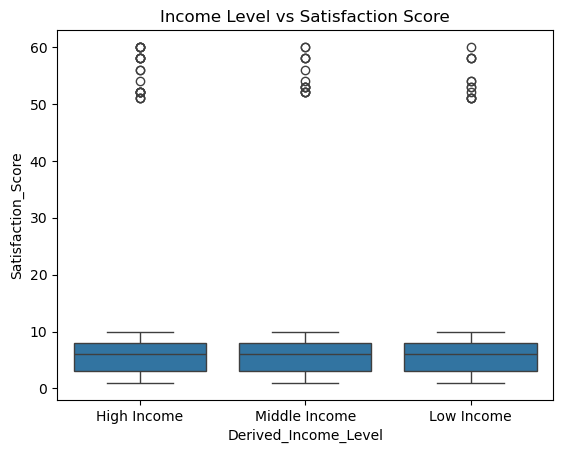

In [22]:
#Income vs Satisfaction
plt.figure()
sns.boxplot(x="Derived_Income_Level", y="Satisfaction_Score", data=df)
plt.title("Income Level vs Satisfaction Score")
plt.show()

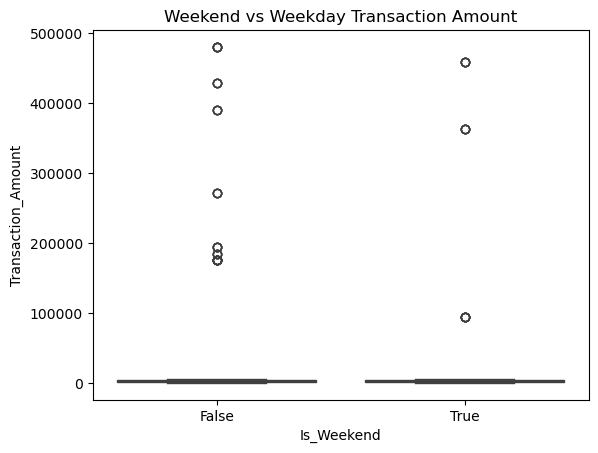

In [23]:
#Weekend vs Weekday Spending
plt.figure()
sns.boxplot(x="Is_Weekend", y="Transaction_Amount", data=df)
plt.title("Weekend vs Weekday Transaction Amount")
plt.show()

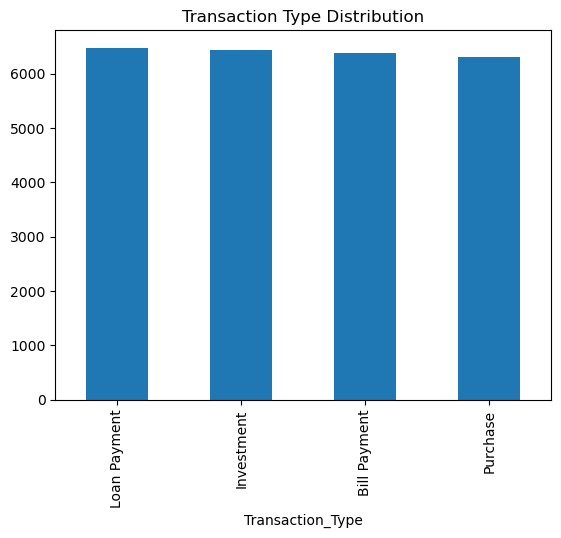

In [24]:
# Transaction Type Distribution
plt.figure()
df["Transaction_Type"].value_counts().plot(kind="bar")
plt.title("Transaction Type Distribution")
plt.show()

In [25]:
#Average Spending by Income Level
df.groupby("Derived_Income_Level")["Transaction_Amount"].mean()

Derived_Income_Level
High Income      5868.731061
Low Income        837.918667
Middle Income    2472.624455
Name: Transaction_Amount, dtype: float64